### 04.1 最小二乘法
#### 4.1.2 数学原理
$$
w = \frac{m\sum_{i=1}^m x_i y_i - \sum_{i=1}^m x_i \sum_{i=1}^m y_i}{m\sum_{i=1}^m x^2_i - (\sum_{i=1}^m x_i)^2} \tag{13}
$$

$$
w = \frac{\sum_{i=1}^m y_i(x_i-\bar x)}{\sum_{i=1}^m x^2_i - (\sum_{i=1}^m x_i)^2/m} \tag{15}
$$

$$
w = \frac{\sum_{i=1}^m x_i(y_i-\bar y)}{\sum_{i=1}^m x^2_i - \bar x \sum_{i=1}^m x_i} \tag{16}
$$

#### 4.1.3 代码实现
首先生成数据：

Text(0, 0.5, 'Power of Air Conditioner(KW)')

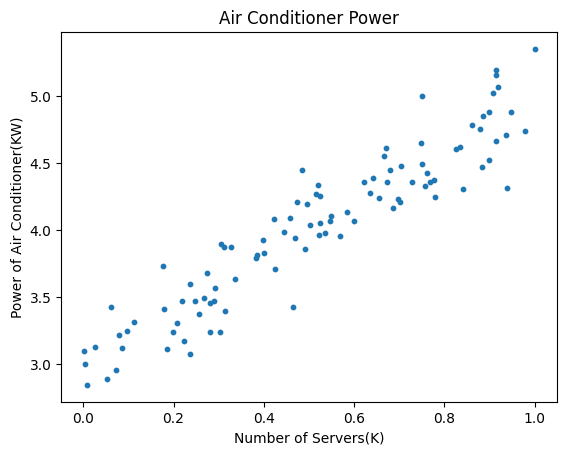

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

file_name = "ch04.npz"

def TargetFunction(X):
    noise = np.random.normal(0,0.2,X.shape)
    W = 2
    B = 3
    Y = np.dot(X, W) + B + noise
    return Y

def CreateSampleData(m):
    file = Path(file_name)
    if file.exists():
        data = np.load(file)
        X = data["data"]
        Y = data["label"]
    else:
        X = np.random.random((m,1))
        Y = TargetFunction(X)
        np.savez(file_name, data=X, label=Y)
    return X, Y
X,Y = CreateSampleData(100)
plt.scatter(X,Y,s=10)
plt.title("Air Conditioner Power")
plt.xlabel("Number of Servers(K)")
plt.ylabel("Power of Air Conditioner(KW)")

导入工具库，并获取$m$数量

In [27]:
from HelperClass.DataReader_1_0 import *
m = X.shape[0]
print(m)

100


##### 方法一
根据公式15，计算$w$的最优解
$$
w = \frac{\sum_{i=1}^m y_i(x_i-\bar x)}{\sum_{i=1}^m x^2_i - (\sum_{i=1}^m x_i)^2/m} \tag{15}
$$

In [28]:
def method1(X,Y,m):
    x_mean = X.mean()
    p = sum(Y*(X-x_mean))
    q = sum(X*X) - sum(X)*sum(X)/m
    w = p/q
    return w
w1 = method1(X,Y,m)
print(w1)

[1.99506269]


根据公式14，计算$b$
$$
b= \frac{1}{m} \sum_{i=1}^m(y_i-wx_i) \tag{14}
$$

In [29]:
def calculate_b_1(X,Y,w,m):
    b = sum(Y-w*X)/m
    return b
b1 = calculate_b_1(X,Y,w1,m)
print(b1)

[2.9972434]


##### 方法二
根据公式16，计算$w$的最优解
$$
w = \frac{\sum_{i=1}^m x_i(y_i-\bar y)}{\sum_{i=1}^m x^2_i - \bar x \sum_{i=1}^m x_i} \tag{16}
$$

In [30]:
def method2(X,Y,m):
    x_mean = X.mean()
    y_mean = Y.mean()
    p = sum(X*(Y-y_mean))
    q = sum(X*X) - x_mean*sum(X)
    w = p/q
    return w
w2 = method2(X,Y,m)
print(w2)

[1.99506269]


根据公式9，计算$b$
$$
b = \frac{1}{m}\left(\sum_{i=1}^m{y_i} - w\sum_{i=1}^m{x_i}\right)=\bar y-w \bar x \tag{9}
$$

In [31]:
def calculate_b_2(X,Y,w):
    b = Y.mean() - w * X.mean()
    return b
b2 = calculate_b_2(X,Y,w2)
print(b2)

[2.9972434]


##### 方法三
根据公式13，计算$w$的最优解
$$
w = \frac{m\sum_{i=1}^m x_i y_i - \sum_{i=1}^m x_i \sum_{i=1}^m y_i}{m\sum_{i=1}^m x^2_i - (\sum_{i=1}^m x_i)^2} \tag{13}
$$

In [32]:
def method3(X,Y,m):
    p = m*sum(X*Y) - sum(X)*sum(Y)
    q = m*sum(X*X) - sum(X)*sum(X)
    w = p/q
    return w
w3 = method3(X,Y,m)
b3 = calculate_b_1(X,Y,w3,m)
print(w3)
print(b3)

[1.99506269]
[2.9972434]


画出该条直线的图：

Text(0, 0.5, 'Power of Air Conditioner(KW)')

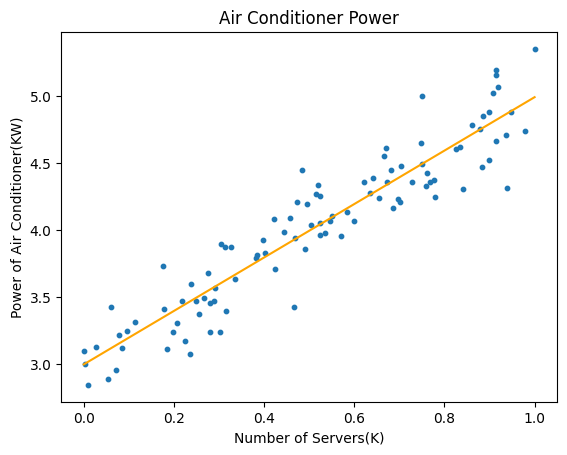

In [37]:
plot_x = np.linspace(0,1)
plot_y = w1*plot_x + b1
plt.scatter(X,Y,s=10)
plt.plot(plot_x,plot_y,color='orange')
plt.title("Air Conditioner Power")
plt.xlabel("Number of Servers(K)")
plt.ylabel("Power of Air Conditioner(KW)")